# Telecommunication Customer Segmentation with K-Nearest Neighbors

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## The Dataset

The dataset is from a Telecommunication company that segments its customers for tiered service delivery. 
Here, we build a `KNN`classifer to predict the customer category.

Data source [IBM skills network](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv). 

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
- 1- Basic Service
- 2- E-Service
- 3- Plus Service
- 4- Total Service


Loading the Data

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv"

df = pd.read_csv(url)

The data columns:

In [6]:
df.columns.values

array(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'], dtype=object)

Are there any missing data?

In [7]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

What are the data types of the columns?

In [8]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

In [9]:
df.custcat.value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

## Exploratory Data Analysis

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
region,1000.0,2.022,0.816200,1.0,1.0,2.0,3.0,3.0
tenure,1000.0,35.526,21.359812,1.0,17.0,34.0,54.0,72.0
age,1000.0,41.684,12.558816,18.0,32.0,40.0,51.0,77.0
marital,1000.0,0.495,0.500225,0.0,0.0,0.0,1.0,1.0
address,1000.0,11.551,10.086681,0.0,3.0,9.0,18.0,55.0
income,1000.0,77.535,107.044165,9.0,29.0,47.0,83.0,1668.0
ed,1000.0,2.671,1.222397,1.0,2.0,3.0,4.0,5.0
employ,1000.0,10.987,10.082087,0.0,3.0,8.0,17.0,47.0
retire,1000.0,0.047,0.211745,0.0,0.0,0.0,0.0,1.0
gender,1000.0,0.517,0.499961,0.0,0.0,1.0,1.0,1.0


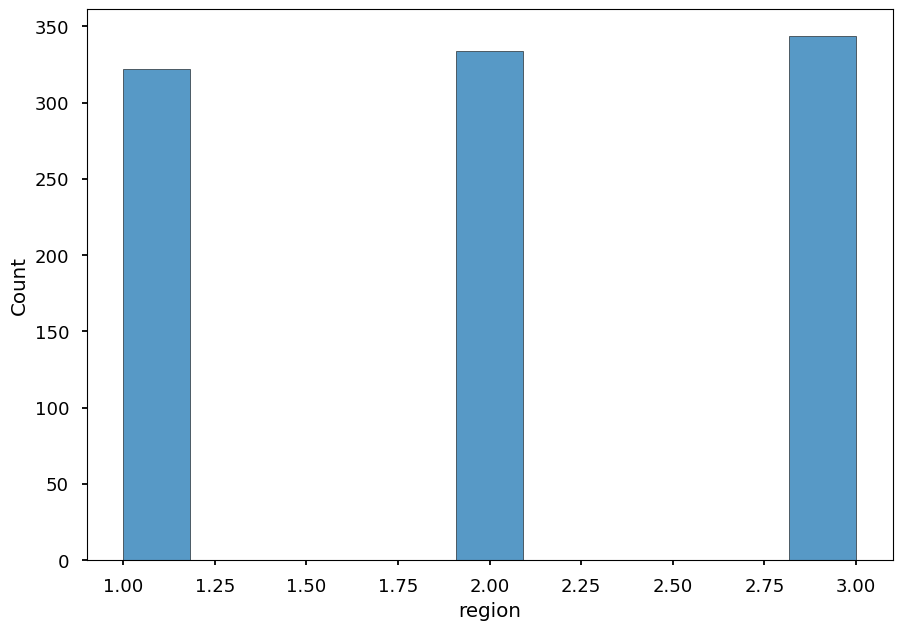

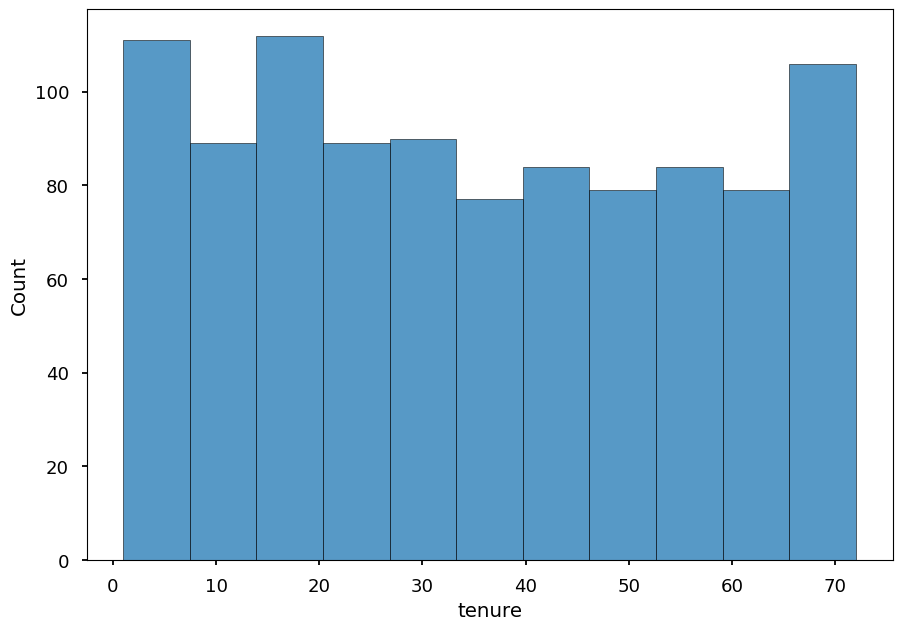

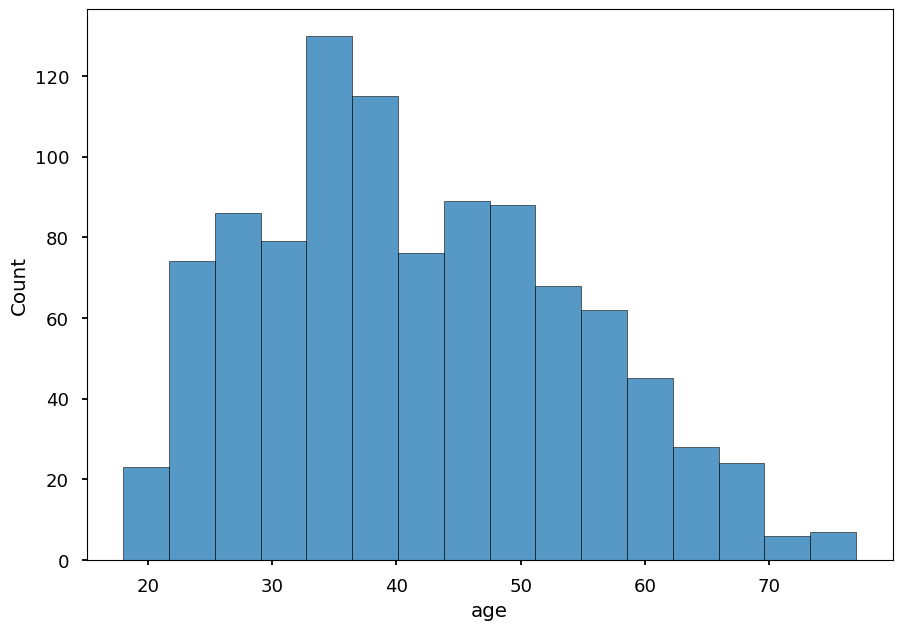

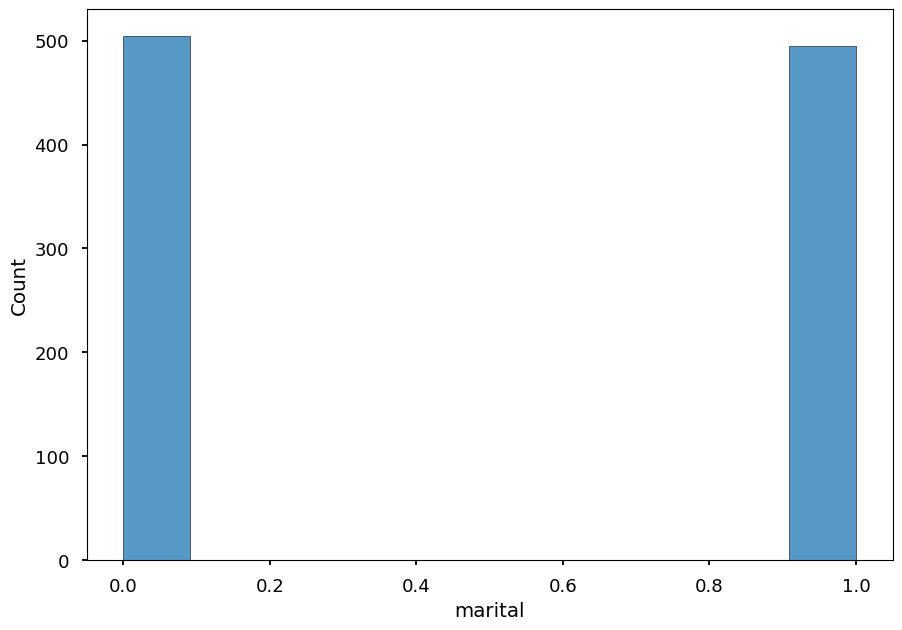

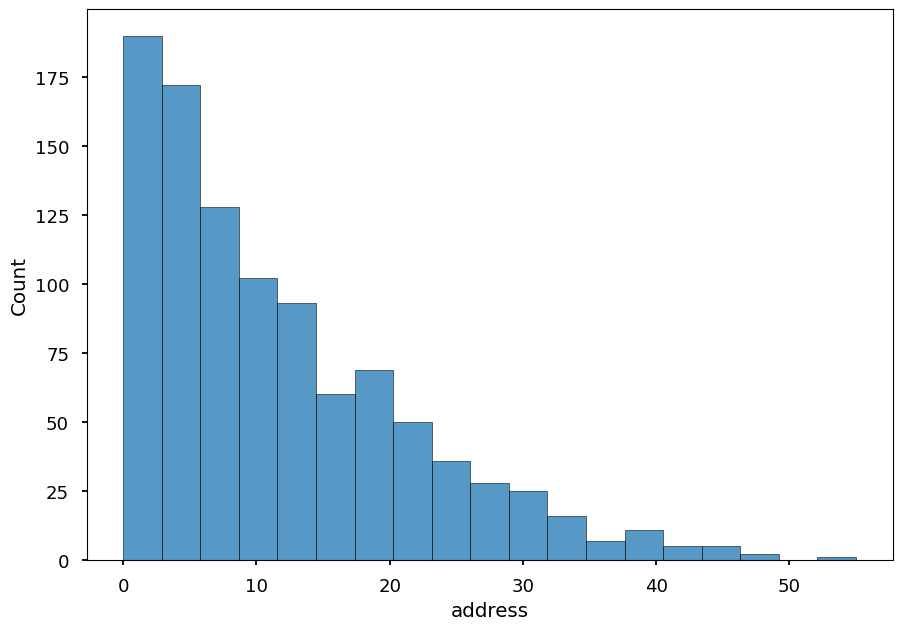

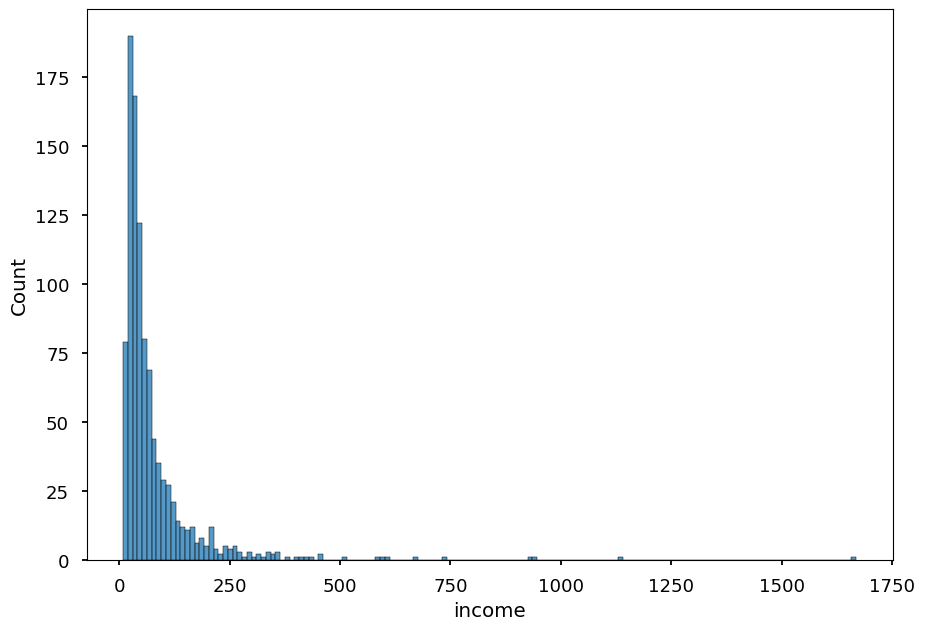

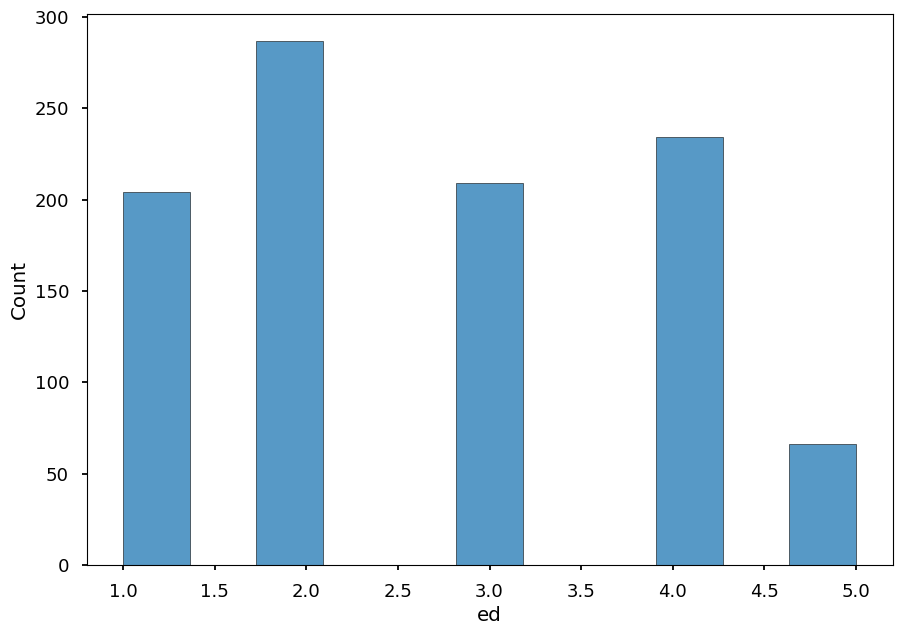

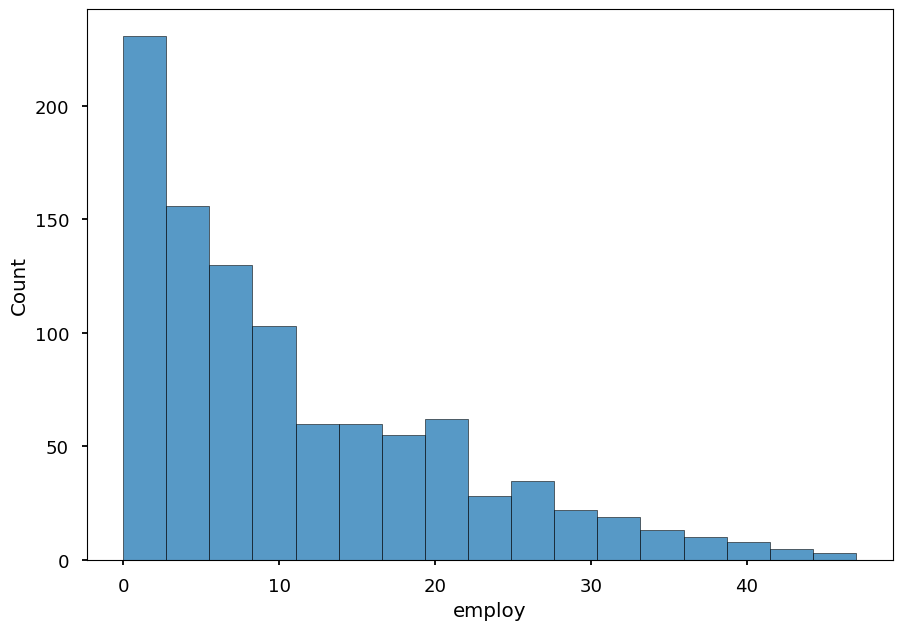

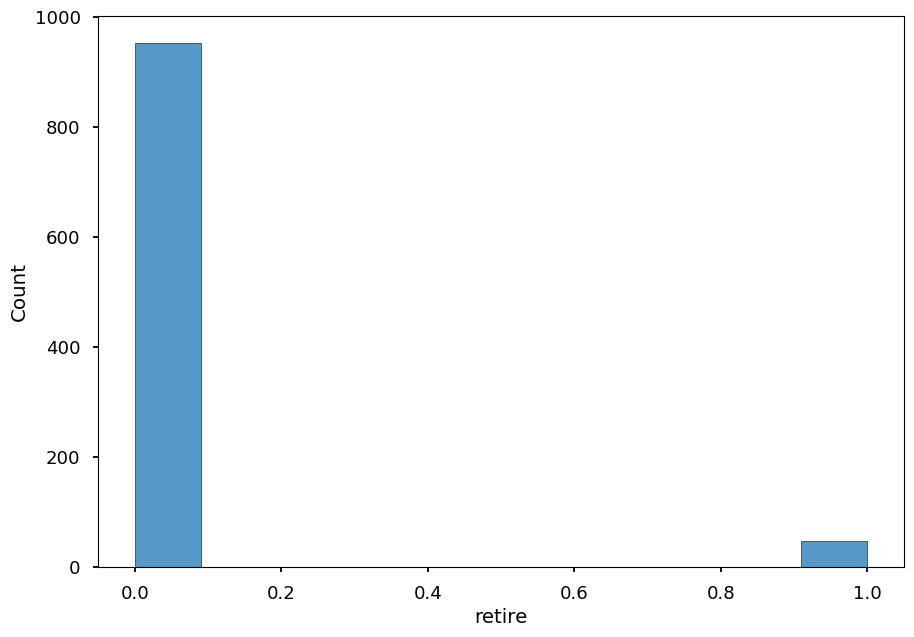

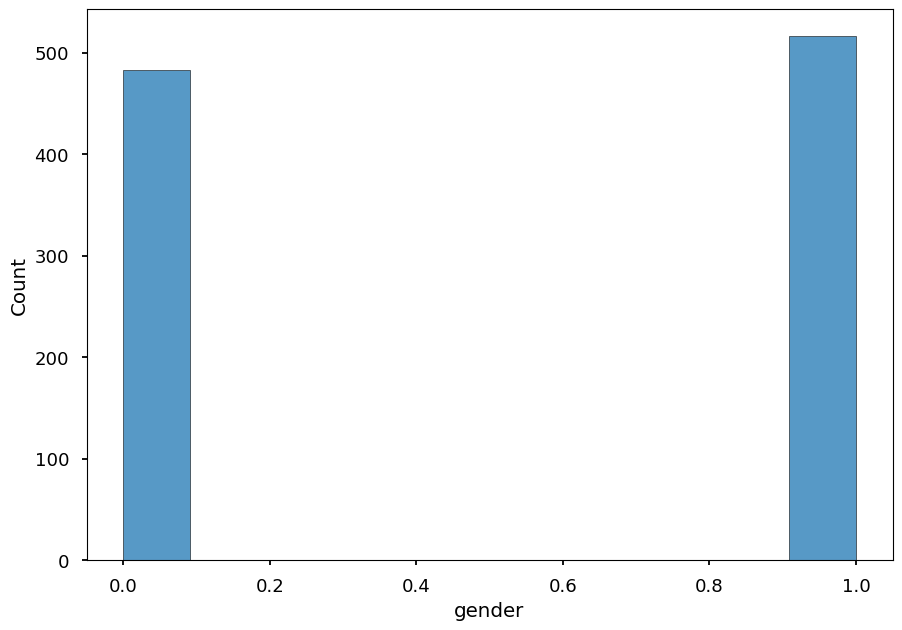

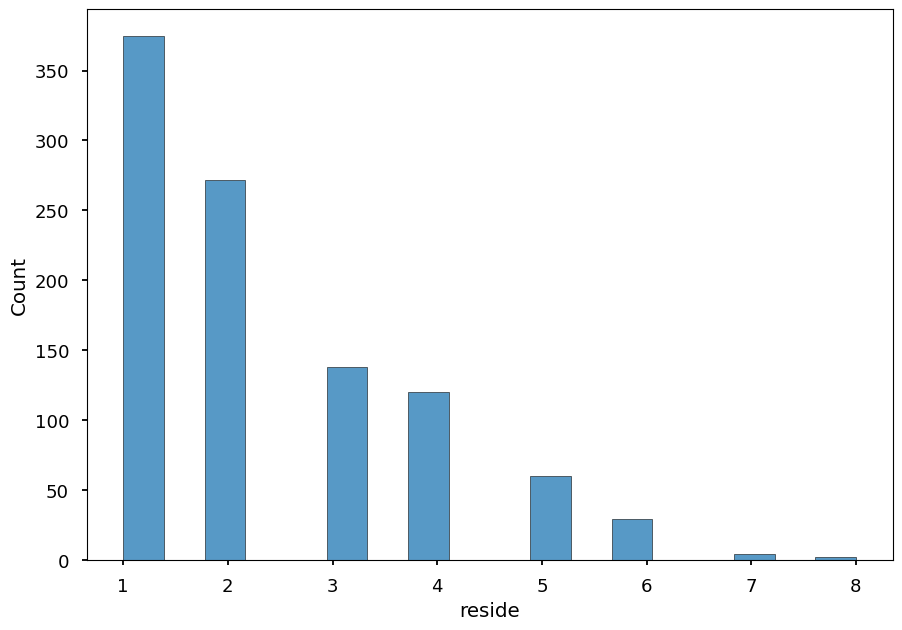

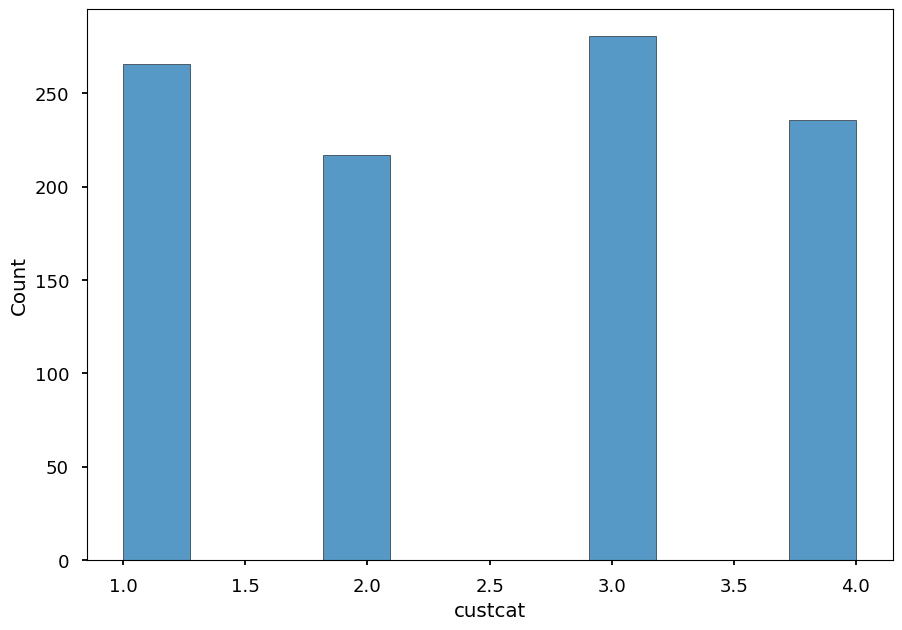

In [28]:
for column in df.columns.values:
    sns.histplot(df[column])
    plt.show()

## Modeling 

In [55]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]

Since KNN is a distance based classifier, it is important to Normalize it the data with StandardScaler. Note that the StandardScaler is sensitive to outliers. 

In [68]:
X_scaled=StandardScaler().fit_transform(X)

The distribution of the data should not change

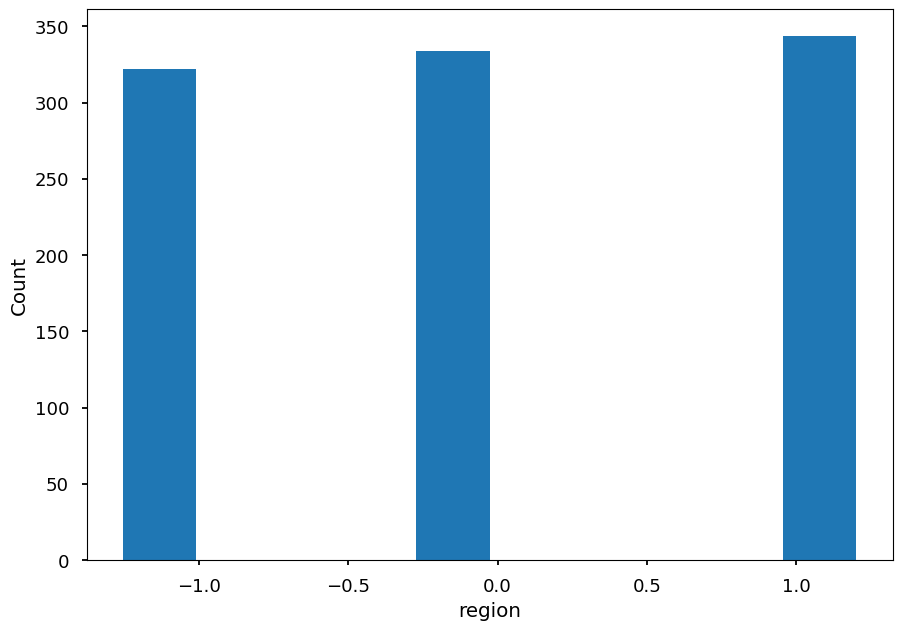

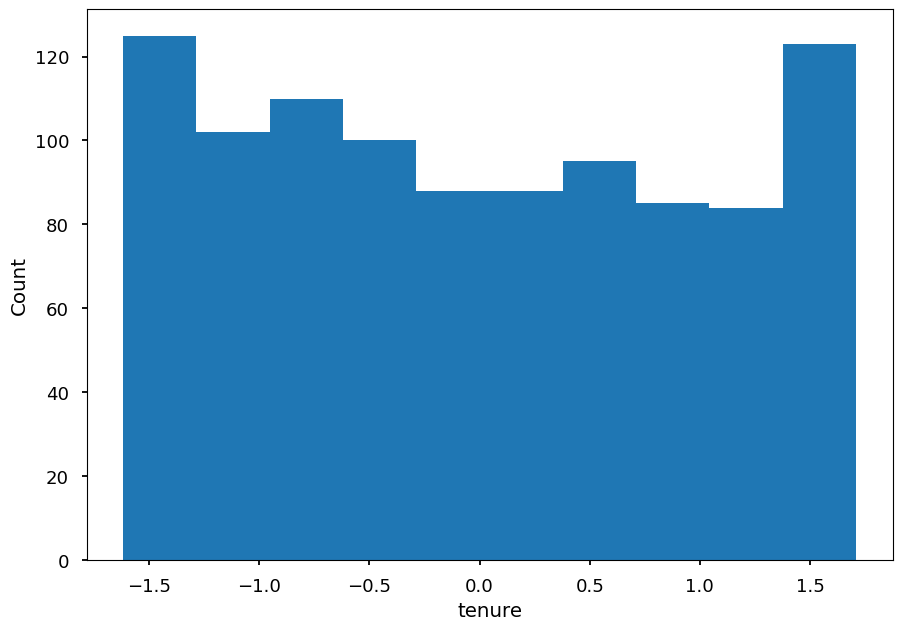

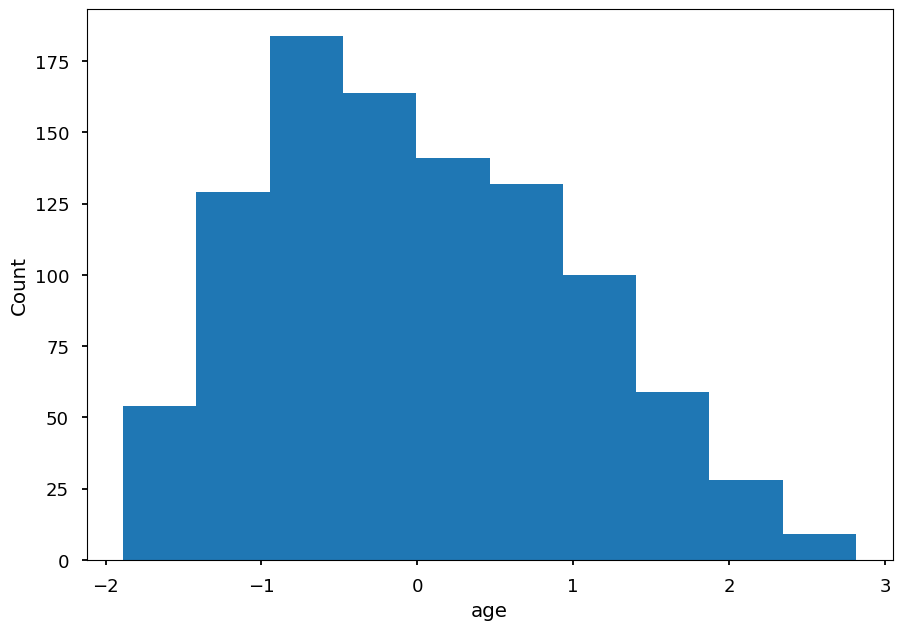

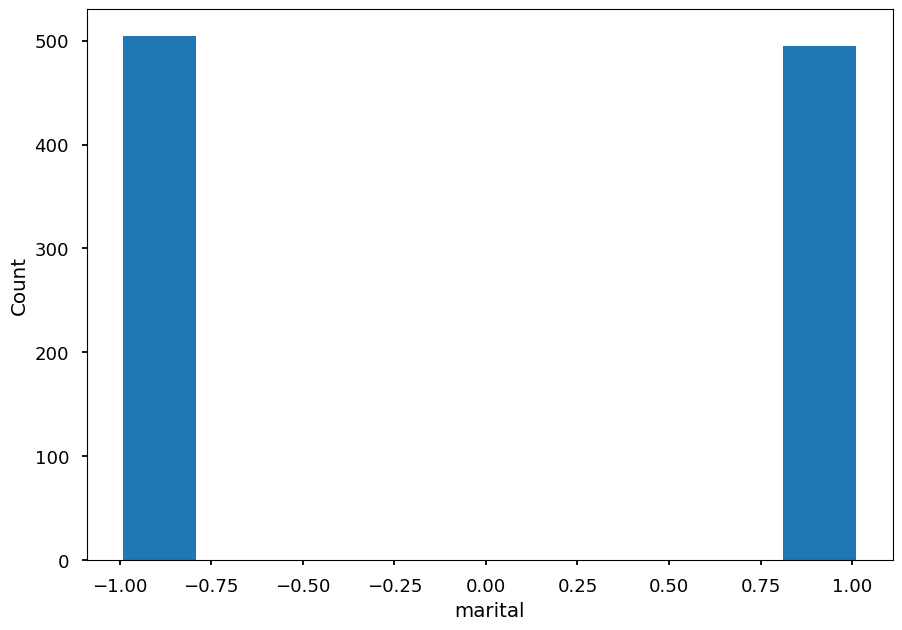

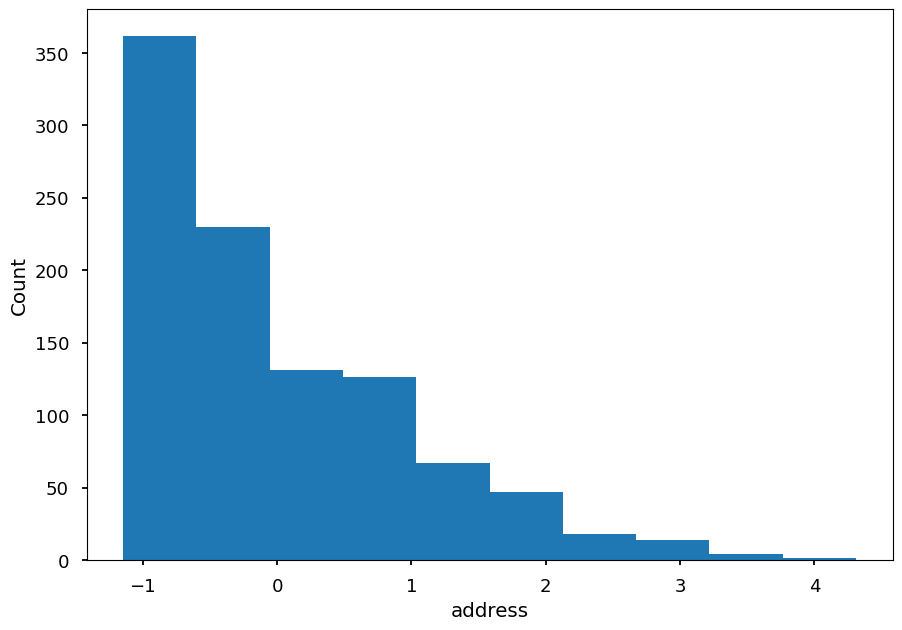

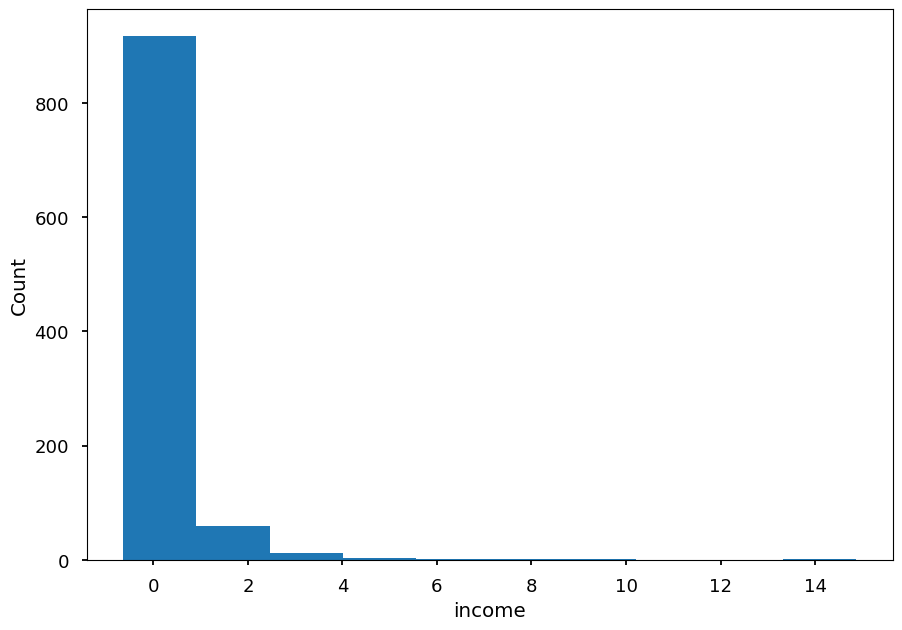

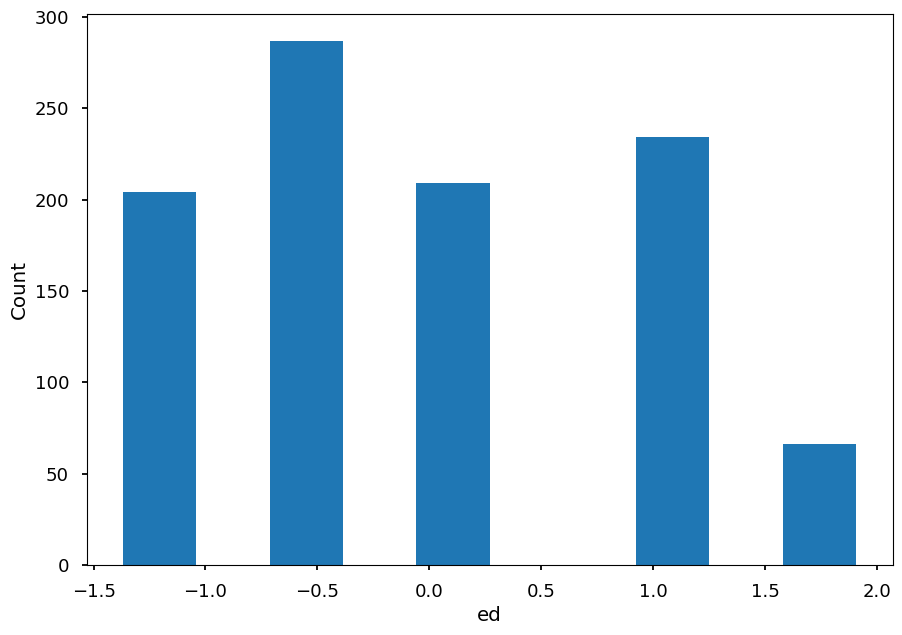

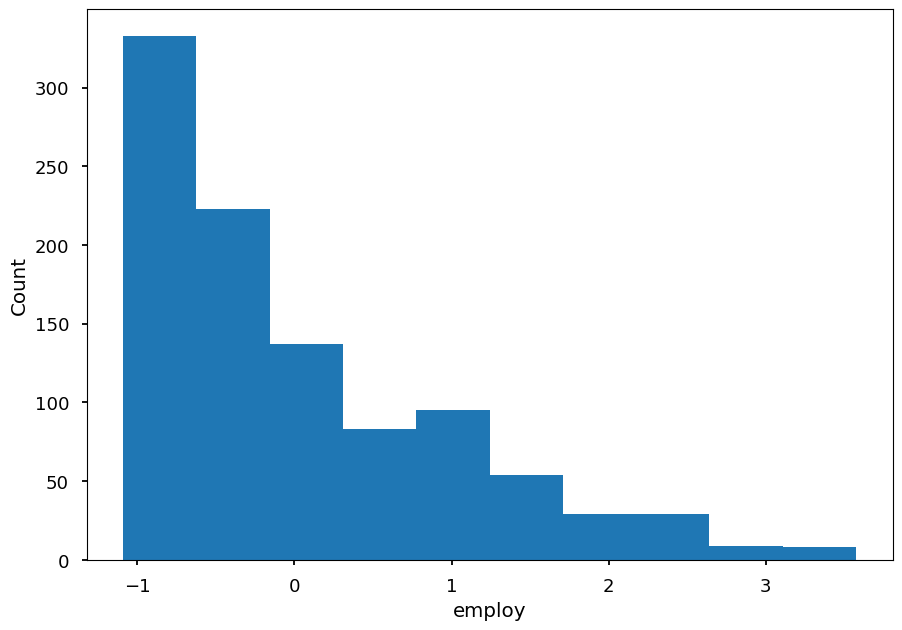

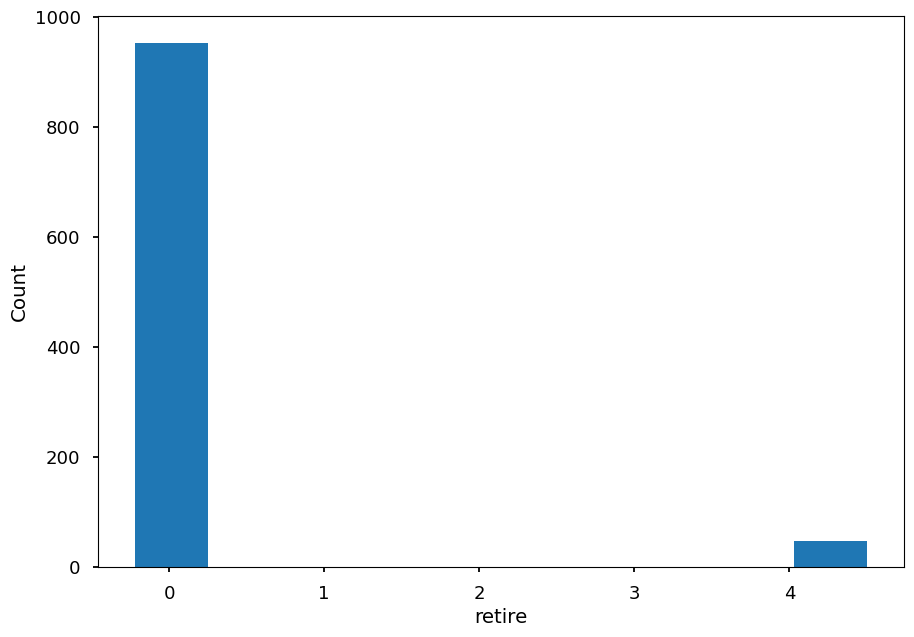

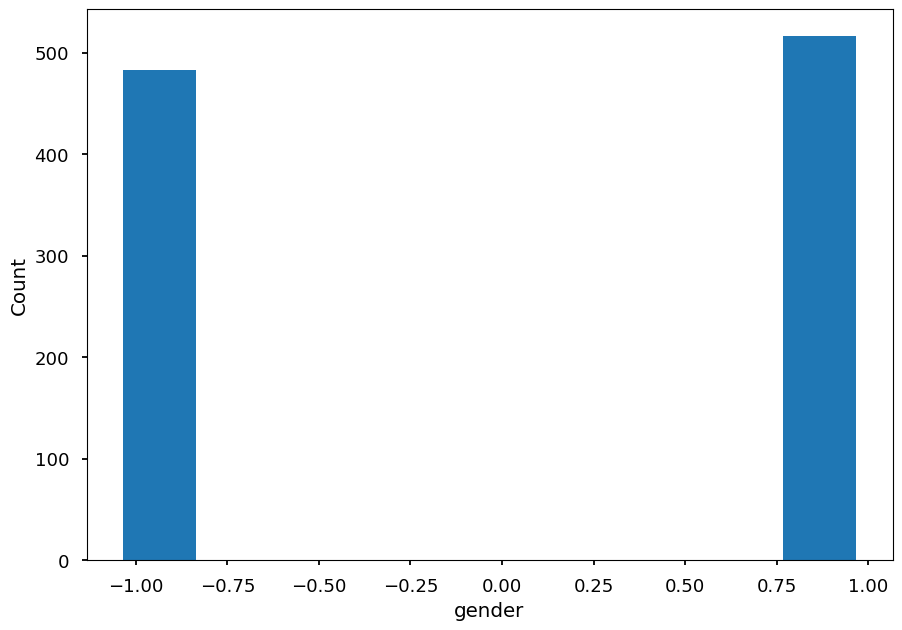

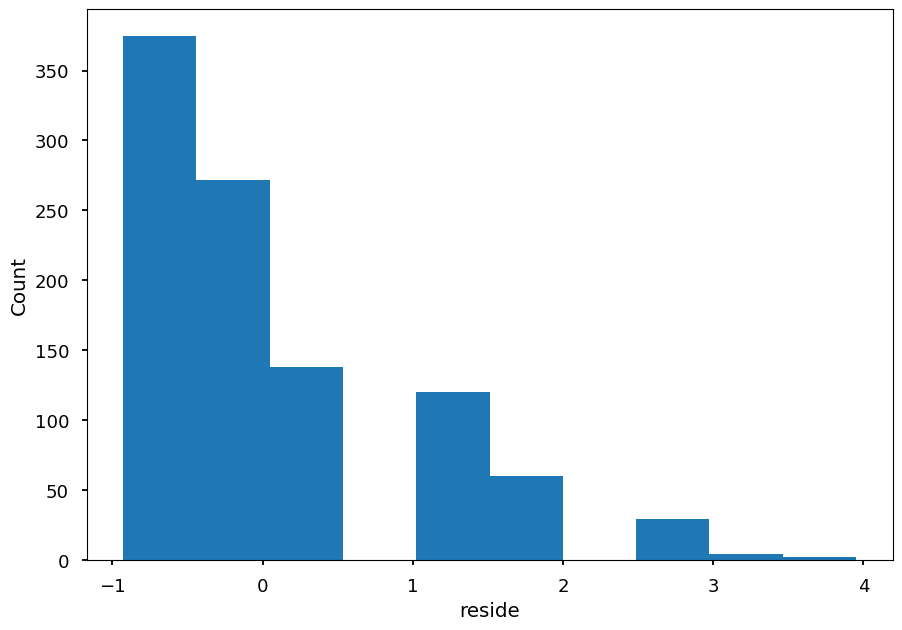

In [69]:
for j , c in  zip(np.arange(0, X_scaled.shape[1]), X.columns) :
    plt.hist(x=X_scaled[:,j])
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()